In [1]:
import pandas as pd
import numpy as np
import random
np.random.seed(2)

_76ers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_76ers_FTs.csv')
Bucks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Bucks_FTs.csv')
Bulls = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Bulls_FTs.csv')
Cavs = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Cavaliers_FTs.csv')
Celtics = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Celtics_FTs.csv')
Clippers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Clippers_FTs.csv')
Grizzlies = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Grizzlies_FTs.csv')
Hawks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Hawks_FTs.csv')
Heat = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Heat_FTs.csv')
Hornets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Hornets_FTs.csv')
Jazz = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Jazz_FTs.csv')
Kings = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Kings_FTs.csv')
Knicks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Knicks_FTs.csv')
Lakers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Lakers_FTs.csv')
Magic = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Magic_FTs.csv')
Mavericks = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Mavericks_FTs.csv')
Nets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Nets_FTs.csv')
Nuggets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Nuggets_FTs.csv')
Pacers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Pacers_FTs.csv')
Pelicans = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Pelicans_FTs.csv')
Pistons = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Pistons_FTs.csv')
Raptors = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Raptors_FTs.csv')
Rockets = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Rockets_FTs.csv')
Spurs = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Spurs_FTs.csv')
Suns = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Suns_FTs.csv')
Thunder = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Thunder_FTs.csv')
Timberwolves = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Timberwolves_FTs.csv')
TrailBlazers = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_TrailBlazers_FTs.csv')
Warriors = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Warriors_FTs.csv')
Wizards = pd.read_csv('/Users/LJin/Documents/projects/Task31_Free_Throw_Project-master/2016-17_FTs/2016-17_Wizards_FTs.csv')

League = [_76ers,Bucks,Bulls,Cavs,Celtics,Clippers,Grizzlies,Hawks,Heat,Hornets,Jazz,Kings,Knicks,Lakers,Magic,Mavericks,
          Nets,Nuggets,Pacers,Pelicans,Pistons,Raptors,Rockets,Spurs,Suns,Thunder,Timberwolves,TrailBlazers,Warriors,Wizards]
df = pd.concat(League)

In [2]:
#drop 7 rows that doesn't contain actual stats
df = df[df['Tm']!='Tm']

#create new feature 'score', describes how many points team is winning or losing by the time of free-throw
df['UpDownTie']=df['Score (Before)'].str.split(' ', expand=True)[1]
df['Score']=df['Score (Before)'].str.split(' ', expand=True)[2]
df['Score']=np.where(df['UpDownTie']=='tied','0',df['Score'])
df['Score']=df['Score'].astype(float)
df['Score']=np.where(df['UpDownTie']=='down',-df['Score'],df['Score'])

#create 'Player' feature and 'Tm_Player' feature
df['Player']=df['Description'].apply(lambda x: x[:x.find('makes')] if x.find('makes')!=-1 
                                     else (x[:x.find('misses')] if x.find('misses')!=-1 else None))
df['Tm_Player']=df['Tm'].astype(str)+"-"+df['Player'].astype(str)

#create 'Success' feature
df['Success']=df['Description'].apply(lambda x: 1 if 'makes' in x else (0 if 'misses' in x else None))

#create 'Clutch' feature
df['Time_new']=df['Time'].apply(lambda x: x[:2])
df['Time_new']=df['Time_new'].astype(int)
clutch = ((df['Qtr']=='4th') & (df['Time_new'] <= 5) & (abs(df['Score'])<=5)) | (df['Qtr'].str.contains('OT') & (abs(df['Score'])<=5))
df['Clutch']=clutch

#create total succeses and failures feature
df["Total_by_Player"]=df.groupby('Tm_Player')['Tm_Player'].transform('count')
df["Success_by_Player"] = df.groupby('Tm_Player')["Success"].transform('sum')
df['Failure_by_Player']=df['Total_by_Player']-df['Success_by_Player']

#create feature Free Throw Rate by Player
df['FTR_by_Player']=(df['Success_by_Player'])/(df['Success_by_Player']+df['Failure_by_Player'])

#drop unnecessary columns
df = df.drop(['UpDownTie','Time_new'],axis=1)

In [3]:
df.head()

,Rk,Date,Tm,Unnamed: 3,Opp,Qtr,Time,Score (Before),Description,Score (After),Score,Player,Tm_Player,Success,Clutch,Total_by_Player,Success_by_Player,Failure_by_Player,FTR_by_Player
0,1,10/26/16,PHI,NaN,OKC,1st,09:10.0,PHI up 3 (5-2),D. Saric makes free throw 1 of 2,PHI up 4 (6-2),3.0,D. Saric,PHI-D. Saric,1,False,218,170,48,0.779817
1,2,10/26/16,PHI,NaN,OKC,1st,09:10.0,PHI up 4 (6-2),D. Saric misses free throw 2 of 2,PHI up 4 (6-2),4.0,D. Saric,PHI-D. Saric,0,False,218,170,48,0.779817
2,3,10/26/16,PHI,NaN,OKC,1st,03:28.0,PHI up 4 (18-14),J. Grant misses free throw 1 of 2,PHI up 4 (18-14),4.0,J. Grant,PHI-J. Grant,0,False,8,4,4,0.500000
3,4,10/26/16,PHI,NaN,OKC,1st,03:28.0,PHI up 4 (18-14),J. Grant makes free throw 2 of 2,PHI up 5 (19-14),4.0,J. Grant,PHI-J. Grant,1,False,8,4,4,0.500000
4,5,10/26/16,PHI,NaN,OKC,1st,02:04.0,PHI down 2 (19-21),J. Grant makes free throw 1 of 2,PHI down 1 (20-21),-2.0,J. Grant,PHI-J. Grant,1,False,8,4,4,0.500000


14.0 6.0


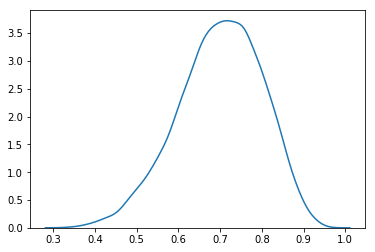

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#create a function that calculate alpha, beta based on mean and variance
def get_beta_params(mu, var):
    alpha = ((1-mu)/var-1/mu)*mu**2
    beta = alpha*(1/mu -1)
    return alpha, beta

#State prior: mean=0.70, std=0.1(2*std=0.2, meaning 95% players fall in between 0.50 and 0.90)
alpha0, beta0 = get_beta_params(0.70, 0.01)
print(alpha0, beta0)
prior=stats.beta.rvs(alpha0,beta0,size=10000)
sns.kdeplot(prior)

In [12]:
#Input=Player name, return=this player's FTR posteria in-clutch vs. out-clutch
def player_FTR(Tm_Player,df):
    alpha_clutch=df[(df['Success']==1) & df['Clutch'] & (df['Tm_Player']==Tm_Player)].shape[0]
    beta_clutch=df[(df['Success']==0) & df['Clutch'] & (df['Tm_Player']==Tm_Player)].shape[0]
    FTR_clutch=stats.beta.rvs(alpha0+alpha_clutch,beta0+beta_clutch,size=10000)
    alpha_non_clutch=df[(df['Success']==1) & (df['Clutch']-1) & (df['Tm_Player']==Tm_Player)].shape[0]
    beta_non_clutch=df[(df['Success']==0) & (df['Clutch']-1) & (df['Tm_Player']==Tm_Player)].shape[0]
    FTR_non_clutch=stats.beta.rvs(alpha0+alpha_non_clutch,beta0+beta_non_clutch,size=10000)
    return FTR_non_clutch, FTR_clutch

#Input=team name, return= ALL players clutch vs. non-clutch time's kde plots in this team
def chart_player_FTR_by_tm(Tm):
    player_names = df[df['Tm']==Tm]['Tm_Player'].unique()
    for each in player_names:
        total_try = df[df['Tm_Player']==each].shape[0]
        clutch_try = df[(df['Tm_Player']==each) & df['Clutch']].shape[0]
        non_clutch_try = df[(df['Tm_Player']==each) & (df['Clutch']-1)].shape[0]
        title = each+"(total try="+str(total_try)+", clutch try="+str(clutch_try)+", non-clutch try="+str(non_clutch_try)+")"
        FTR_non_clutch, FTR_clutch = player_FTR(each, df)
        sns.kdeplot(FTR_non_clutch, label="non clutch"), sns.kdeplot(FTR_clutch, label="clutch")
        plt.title(title)
        plt.figure()

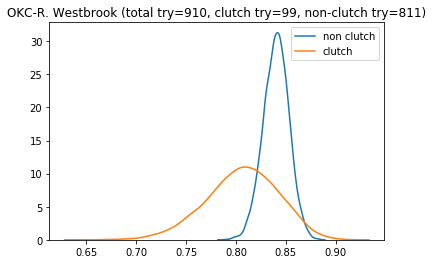

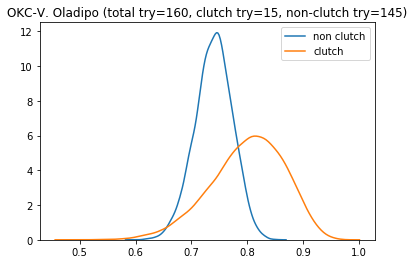

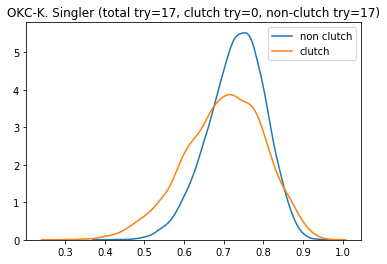

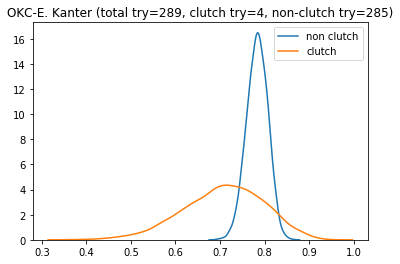

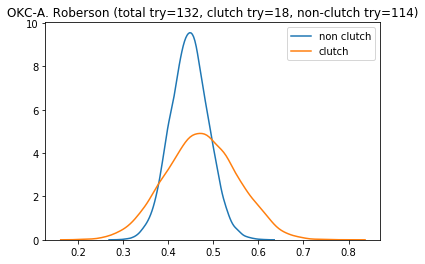

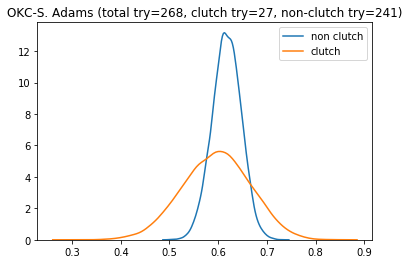

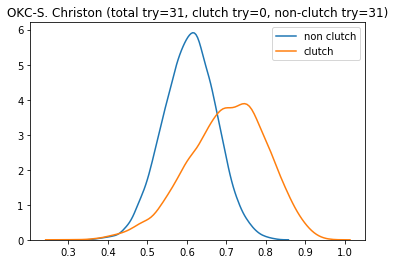

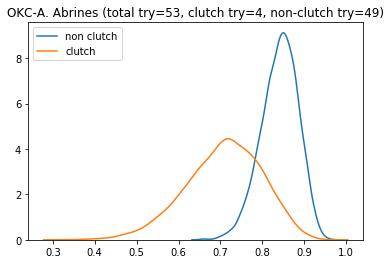

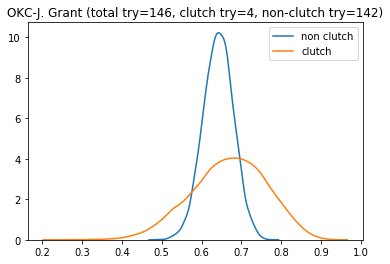

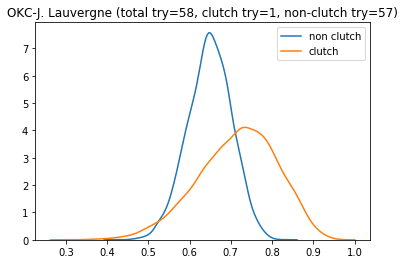

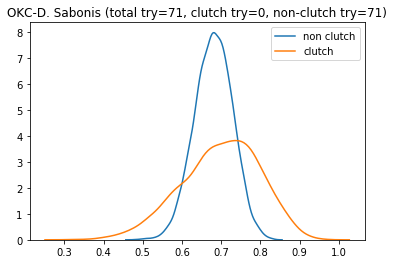

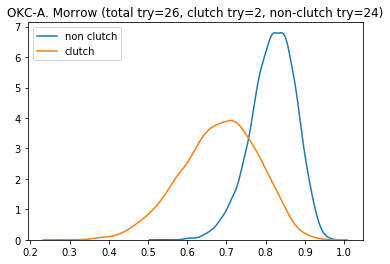

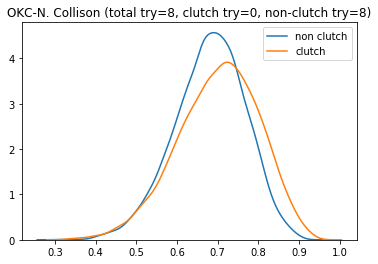

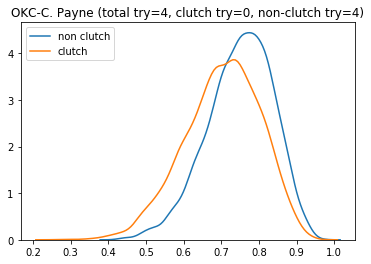

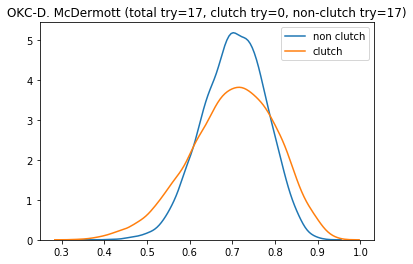

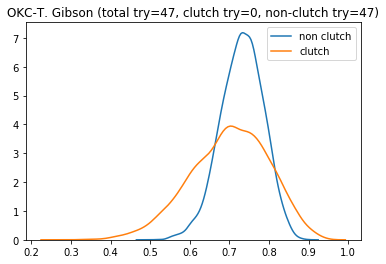

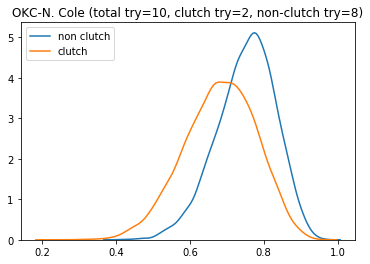

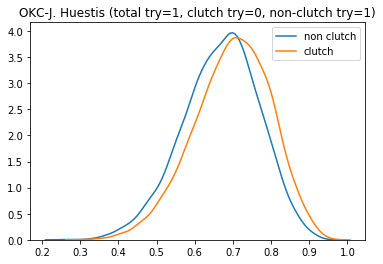

In [13]:
chart_player_FTR_by_tm("OKC")

In [6]:
#filter players with more than 250 tries

df_more=df[df['Total_by_Player']>250]
len(df_more['Tm_Player'].unique())

63

/Users/LJin/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


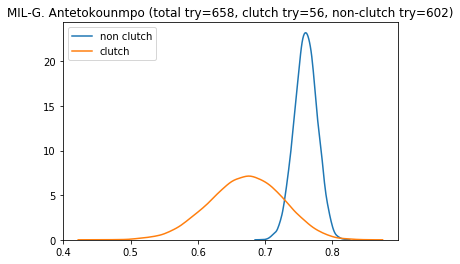

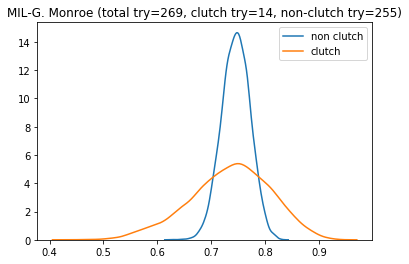

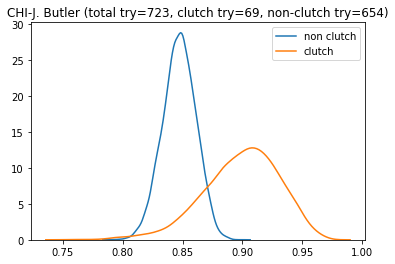

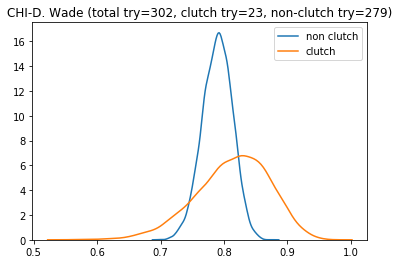

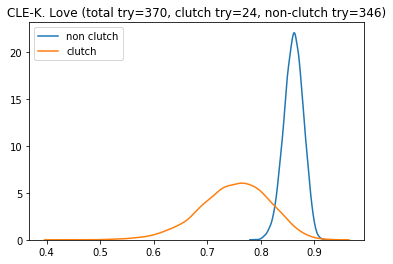

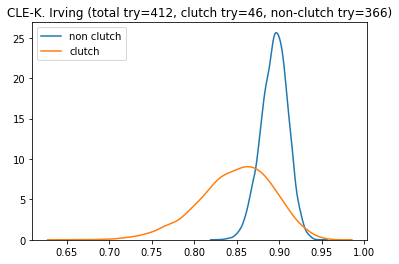

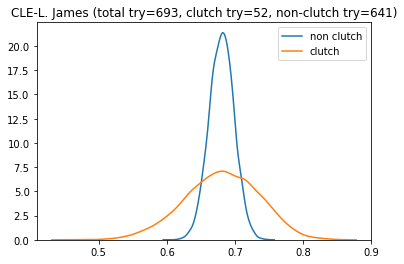

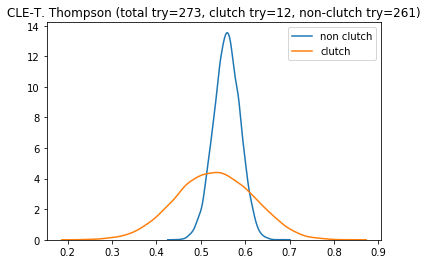

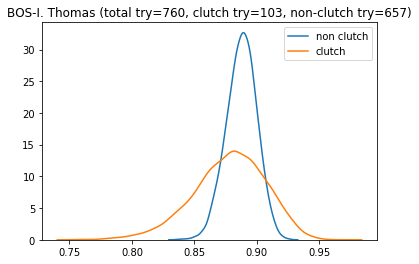

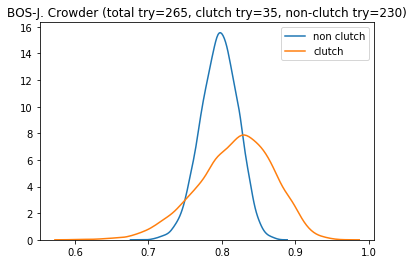

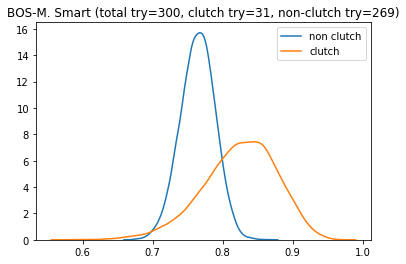

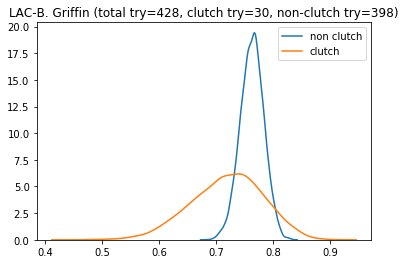

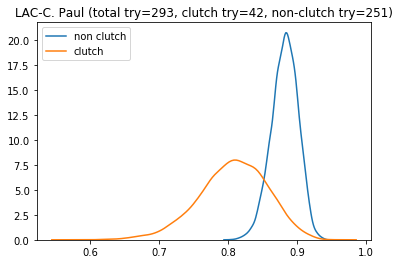

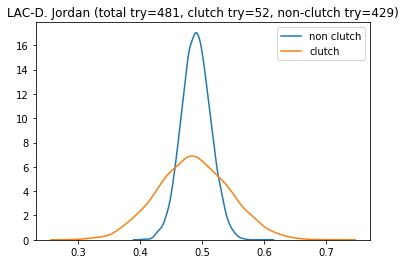

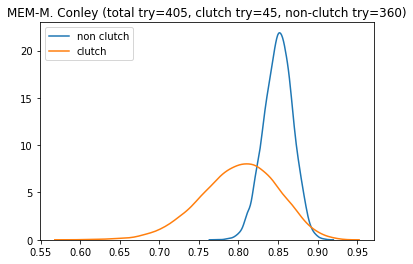

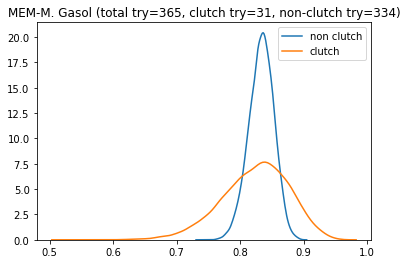

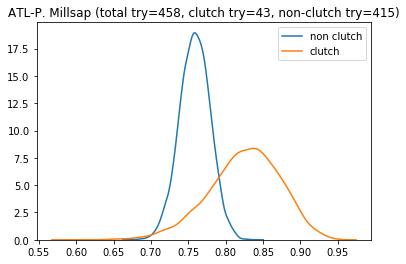

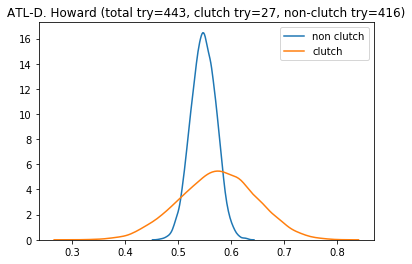

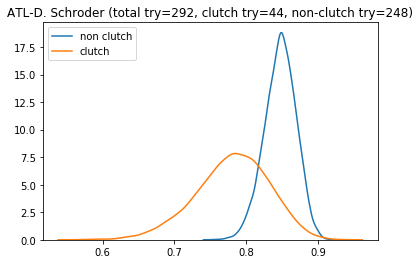

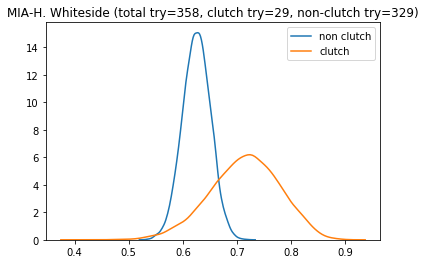

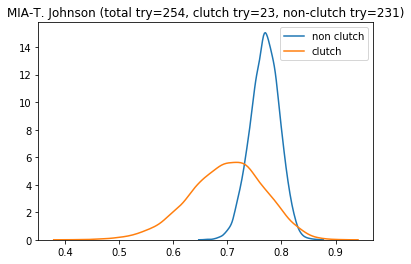

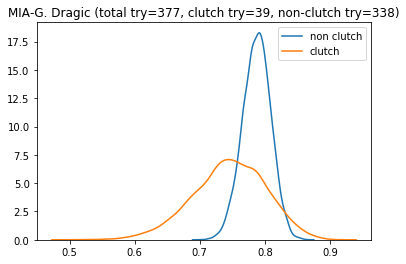

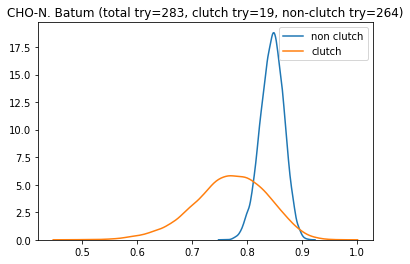

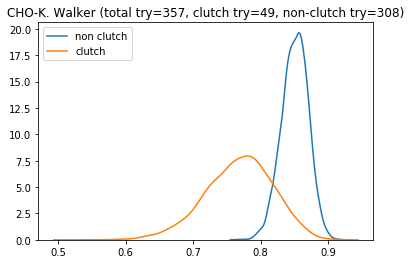

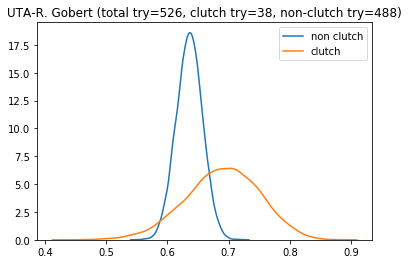

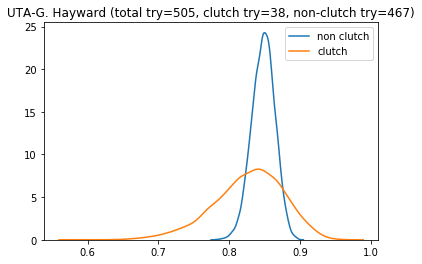

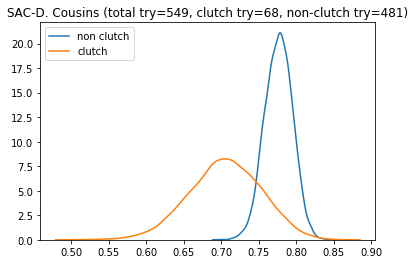

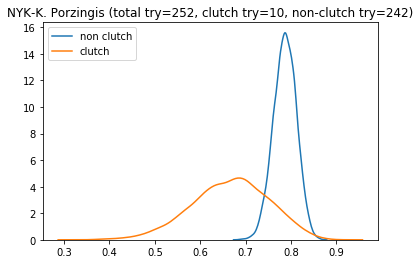

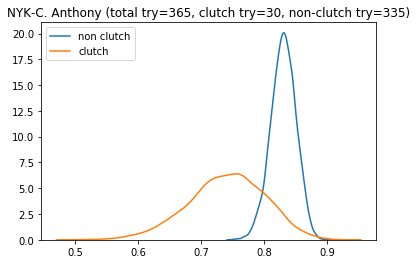

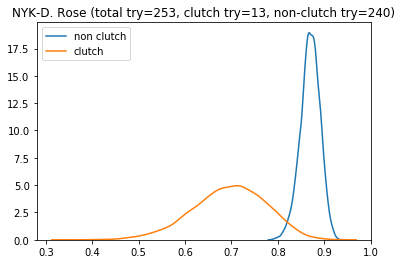

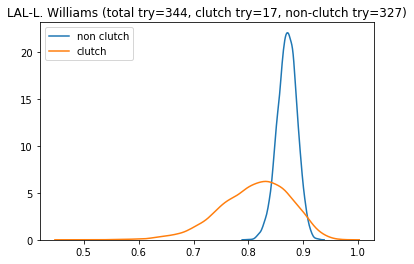

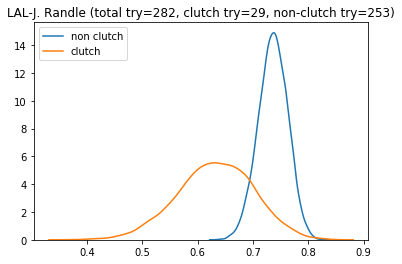

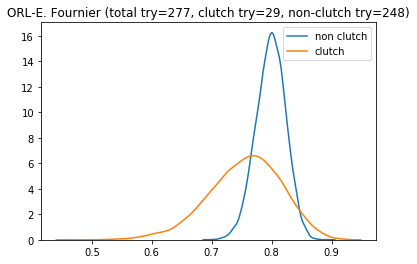

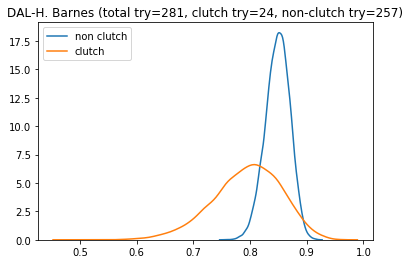

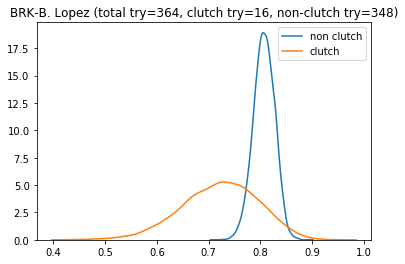

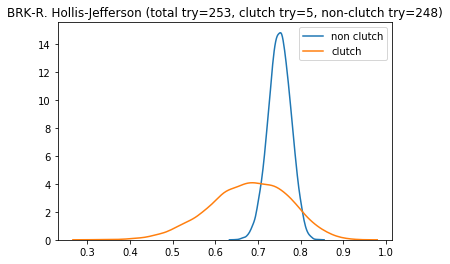

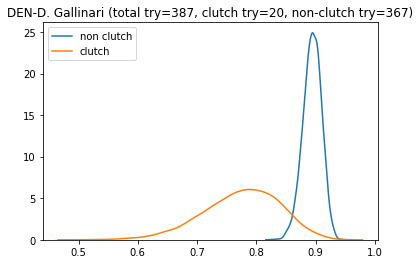

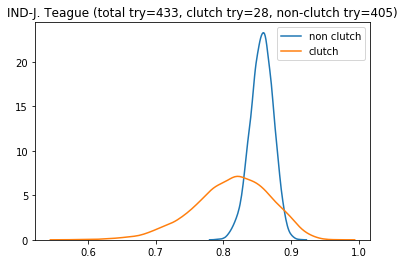

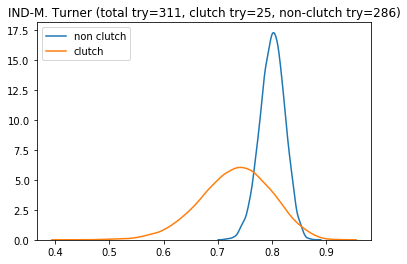

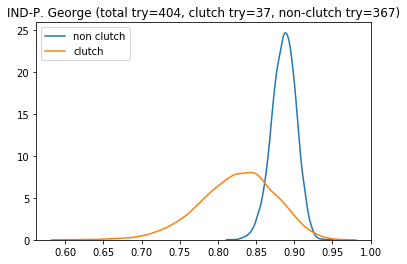

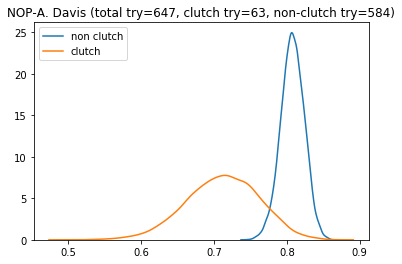

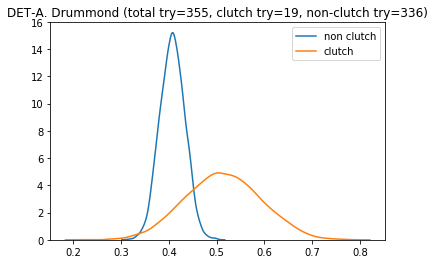

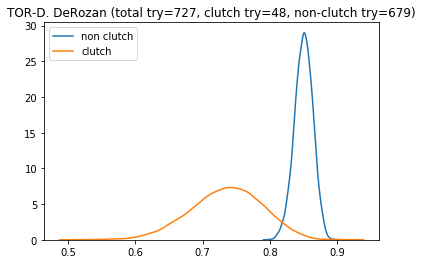

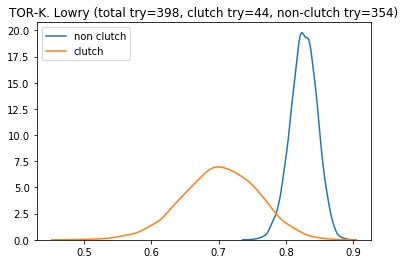

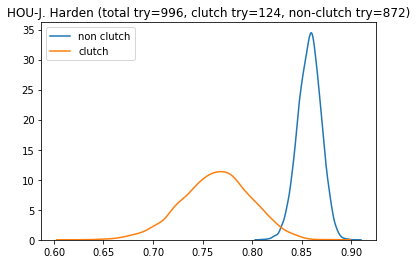

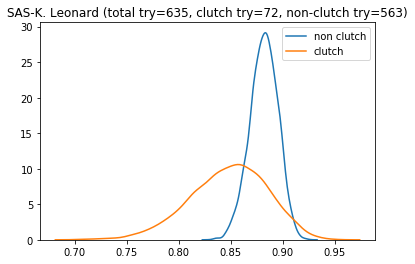

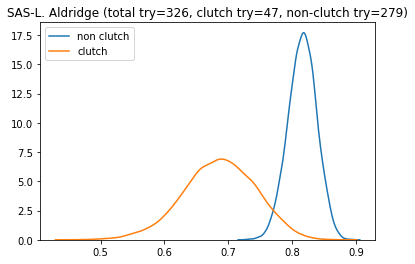

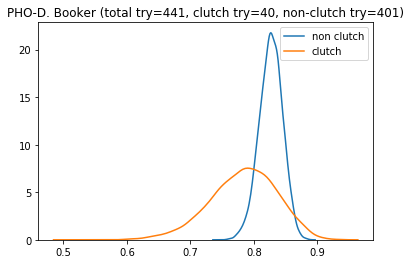

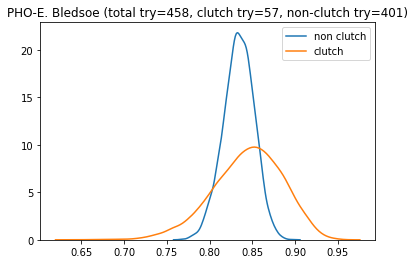

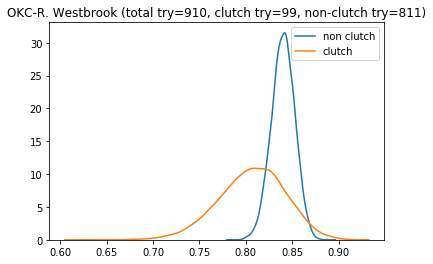

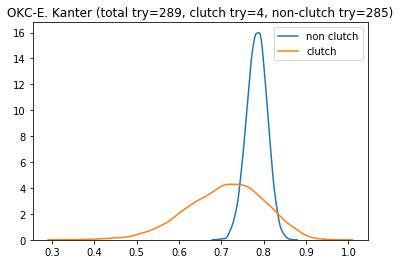

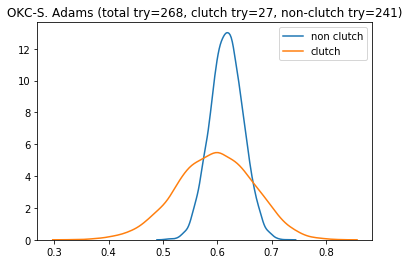

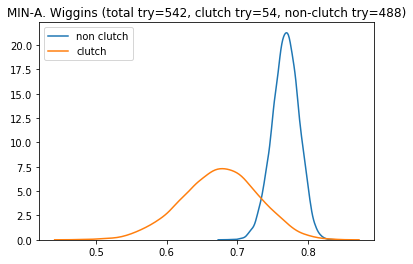

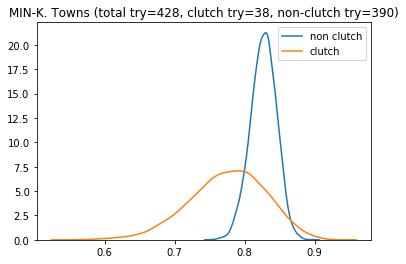

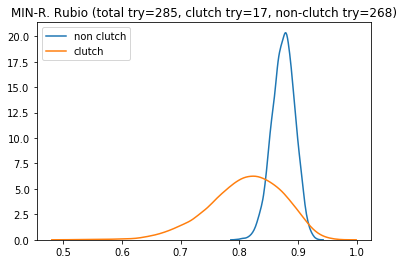

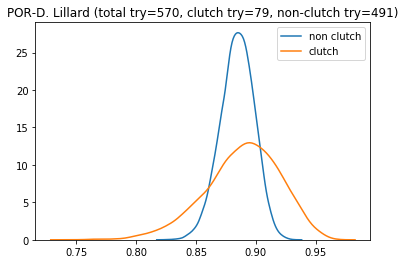

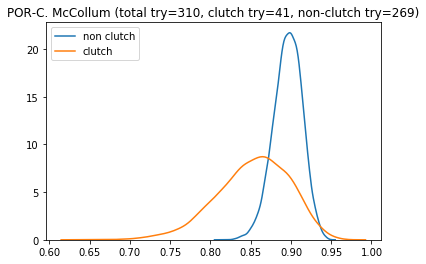

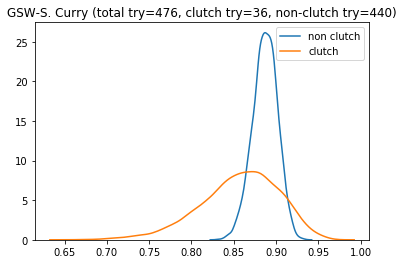

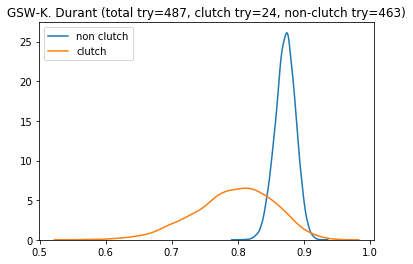

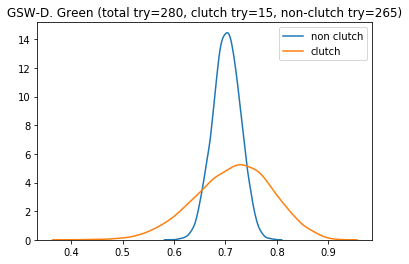

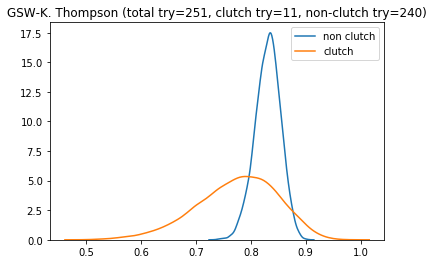

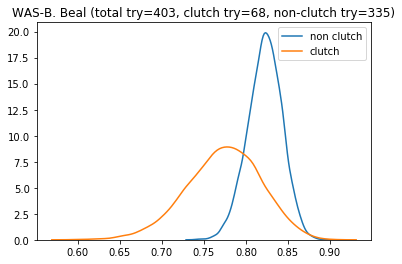

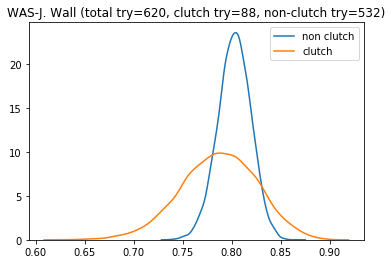

In [14]:
#kde plot for all players with more than 250 tries
for each in df_more['Tm_Player'].unique():
    total_try = df_more[df_more['Tm_Player']==each].shape[0]
    clutch_try = df_more[(df_more['Tm_Player']==each) & df_more['Clutch']].shape[0]
    non_clutch_try = df_more[(df_more['Tm_Player']==each) & (df_more['Clutch']-1)].shape[0]
    title = each+"(total try="+str(total_try)+", clutch try="+str(clutch_try)+", non-clutch try="+str(non_clutch_try)+")"
    FTR_non_clutch, FTR_clutch = player_FTR(each, df_more)
    sns.kdeplot(FTR_non_clutch, label="non clutch"), sns.kdeplot(FTR_clutch, label="clutch")
    plt.title(title)
    plt.figure()

In [23]:
def chart_player_FTR(player,df):
    FTR_non_clutch, FTR_clutch = player_FTR(player, df)
    sns.kdeplot(FTR_non_clutch, label="non clutch"), sns.kdeplot(FTR_clutch, label="clutch")
    total_try = df[df['Tm_Player']==player].shape[0]
    clutch_try = df[(df['Tm_Player']==player) & df['Clutch']].shape[0]
    non_clutch_try = df[(df['Tm_Player']==player) & (df['Clutch']-1)].shape[0]
    title = player+"(total try="+str(total_try)+", clutch try="+str(clutch_try)+", non-clutch try="+str(non_clutch_try)+")"
    plt.title(title)
    plt.figure()

In [19]:
print("Players with better clutch time performance:",)
for each in df_more['Tm_Player'].unique():
    FTR_non_clutch, FTR_clutch = player_FTR(each, df_more)
    higher_rate=np.mean(FTR_clutch>FTR_non_clutch)
    if higher_rate>0.5:
        print(each, higher_rate)

Players with better clutch time performance:
CHI-J. Butler  0.922
CHI-D. Wade  0.6746
BOS-J. Crowder  0.6585
BOS-M. Smart  0.8423
ATL-P. Millsap  0.8986
ATL-D. Howard  0.6394
MIA-H. Whiteside  0.8984
UTA-R. Gobert  0.7982
DET-A. Drummond  0.8961
PHO-E. Bledsoe  0.6156
POR-D. Lillard  0.5683
GSW-D. Green  0.5748


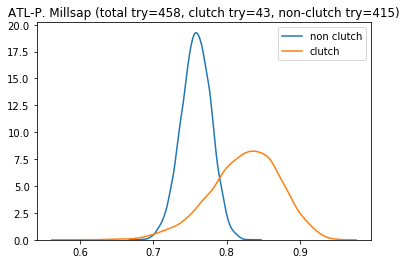

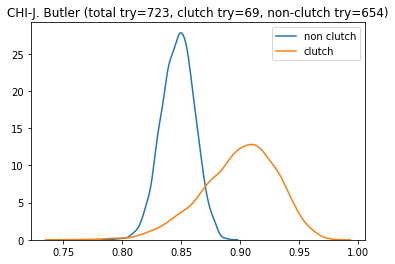

In [24]:
chart_player_FTR("ATL-P. Millsap ",df_more)
chart_player_FTR("CHI-J. Butler ",df_more)

In [21]:
print("Players with worse clutch time performance:")    
for each in df_more['Tm_Player'].unique():
    FTR_non_clutch, FTR_clutch = player_FTR(each, df_more)
    higher_rate=np.mean(FTR_clutch>FTR_non_clutch)
    if higher_rate<0.5:
        print(each, higher_rate)

Players with worse clutch time performance:
MIL-G. Antetokounmpo  0.0503
MIL-G. Monroe  0.4764
CLE-K. Love  0.0395
CLE-K. Irving  0.1638
CLE-T. Thompson  0.3809
BOS-I. Thomas  0.3904
LAC-B. Griffin  0.2728
LAC-C. Paul  0.0707
LAC-D. Jordan  0.4813
MEM-M. Conley  0.1756
MEM-M. Gasol  0.4573
ATL-D. Schroder  0.1103
MIA-T. Johnson  0.1668
MIA-G. Dragic  0.2437
CHO-N. Batum  0.1404
CHO-K. Walker  0.0575
UTA-G. Hayward  0.3723
SAC-D. Cousins  0.083
NYK-K. Porzingis  0.0842
NYK-C. Anthony  0.0741
NYK-D. Rose  0.009
LAL-L. Williams  0.1857
LAL-J. Randle  0.0755
ORL-E. Fournier  0.2656
DAL-H. Barnes  0.2131
BRK-B. Lopez  0.1299
BRK-R. Hollis-Jefferson  0.2339
DEN-D. Gallinari  0.0232
IND-J. Teague  0.2357
IND-M. Turner  0.1657
IND-P. George  0.1175
NOP-A. Davis  0.0246
TOR-D. DeRozan  0.0104
TOR-K. Lowry  0.0149
HOU-J. Harden  0.0025
SAS-K. Leonard  0.1973
SAS-L. Aldridge  0.0127
PHO-D. Booker  0.2302
OKC-R. Westbrook  0.1927
OKC-E. Kanter  0.2269
OKC-S. Adams  0.3905
MIN-A. Wiggins  0.051
MIN

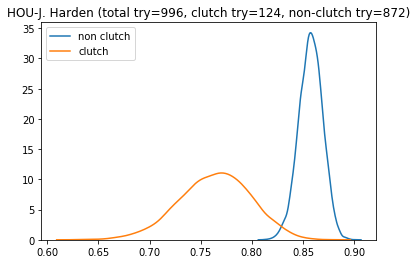

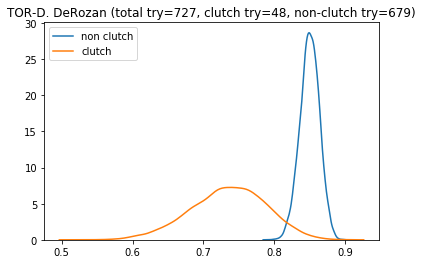

In [26]:
chart_player_FTR("HOU-J. Harden ",df_more)
chart_player_FTR("TOR-D. DeRozan ",df_more)